<a href="https://colab.research.google.com/github/Vedant-Dere/ML-Model/blob/main/ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

Data Loading and Preprocessing:

In [2]:
# Load the dataset
file_path = "100000 Sales Records.csv"
df = pd.read_csv("/content/100000 Sales Records.csv")

# Convert date columns to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"], errors='coerce')
df["Ship Date"] = pd.to_datetime(df["Ship Date"], errors='coerce')

# Feature Engineering: Extract year and month
df["Order Year"] = df["Order Date"].dt.year
df["Order Month"] = df["Order Date"].dt.month

Feature Selection and Encoding:

In [3]:
# Select features and target
features = ["Region", "Country", "Item Type", "Sales Channel", "Units Sold", "Unit Price", "Unit Cost", "Order Year", "Order Month"]
target = "Total Revenue"

# Handle categorical variables with One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
categorical_cols = ["Region", "Country", "Item Type", "Sales Channel"]
encoded_features = encoder.fit_transform(df[categorical_cols])
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
df_encoded = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Combine numerical and encoded categorical features
numerical_cols = ["Units Sold", "Unit Price", "Unit Cost", "Order Year", "Order Month"]
df_final = pd.concat([df[numerical_cols], df_encoded], axis=1)



Data Imputation:

In [4]:
# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
df_final = pd.DataFrame(imputer.fit_transform(df_final), columns=df_final.columns)
df['Total Revenue'] = df['Total Revenue'].fillna(df['Total Revenue'].mean())

Model Training and Evaluation:

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_final, df[target], test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Visualization:


Mean Absolute Error: 464910.2895344922
R² Score: 0.818809347771846
Top 10 Predictions:
   Actual Revenue  Predicted Revenue
0       409491.48       6.891599e+04
1      1264026.50       1.297231e+06
2        81139.50      -6.757140e+05
3       828779.52       1.196596e+06
4      5327448.44       4.146091e+06
5       599083.80       1.133435e+06
6      1409381.43       2.605072e+06
7      1807897.30       2.014856e+06
8      4121047.20       3.342837e+06
9       576768.61       9.806333e+05


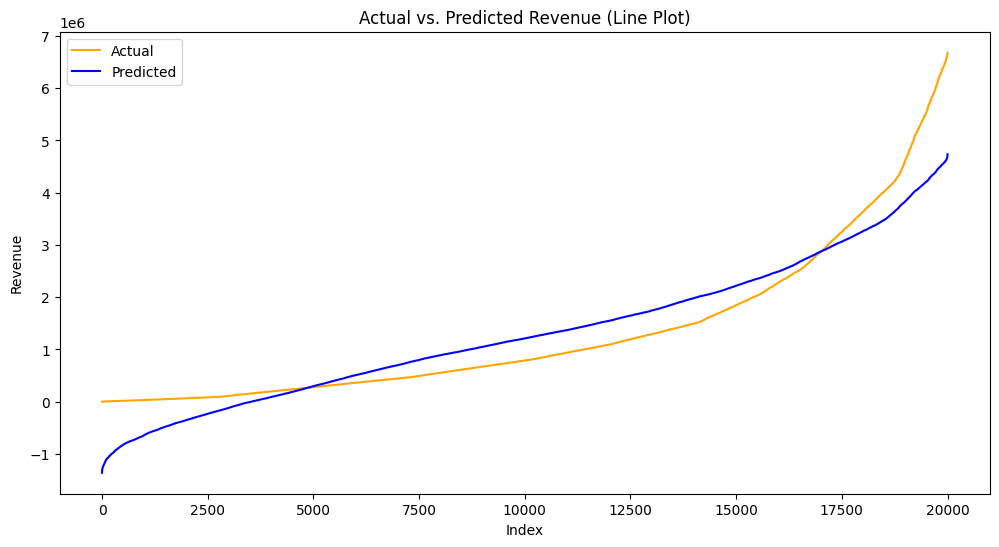

<ipython-input-6-7accc92533b1>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Region"], order=df["Region"].value_counts().index, palette="coolwarm")


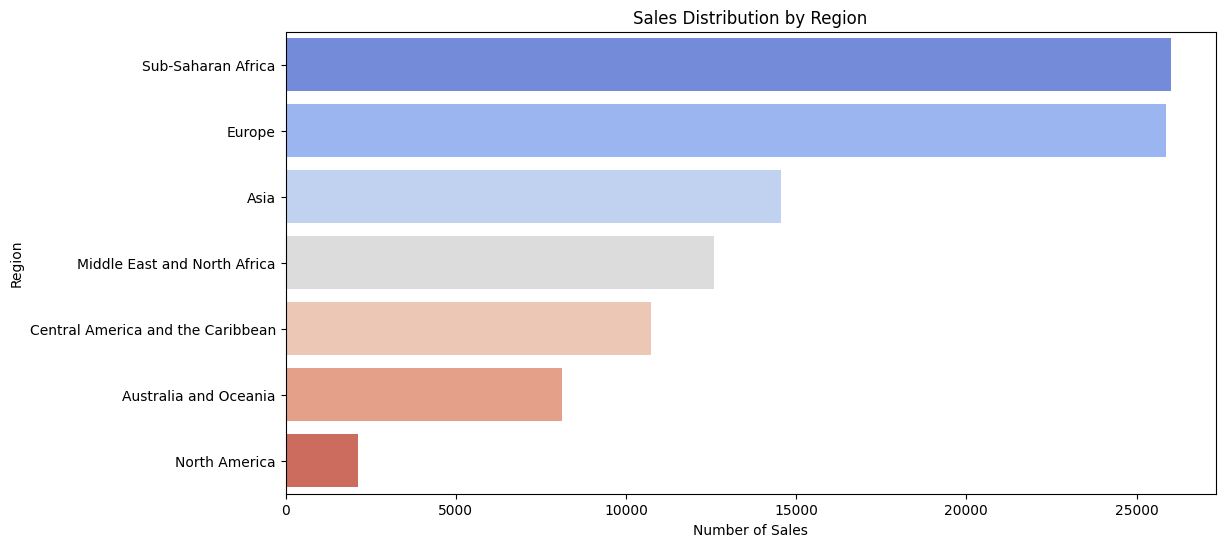

In [6]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred) #It gives us an idea of the magnitude of errors in the predictions.
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

# Top 10 Predictions
predictions_df = pd.DataFrame({"Actual Revenue": y_test.values, "Predicted Revenue": y_pred})
predictions_df = predictions_df.head(10)
print("Top 10 Predictions:")
print(predictions_df)

# Visualization
# Line Plot for Actual vs. Predicted
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test.sort_values(), label='Actual', color='orange')
plt.plot(range(len(y_test)), np.sort(y_pred), label='Predicted', color='blue')
plt.xlabel("Index")
plt.ylabel("Revenue")
plt.title("Actual vs. Predicted Revenue (Line Plot)")
plt.legend()
plt.show()

# Sales Distribution by Region (Geographical Heatmap)
plt.figure(figsize=(12, 6))
sns.countplot(y=df["Region"], order=df["Region"].value_counts().index, palette="coolwarm")
plt.xlabel("Number of Sales")
plt.ylabel("Region")
plt.title("Sales Distribution by Region")
plt.show()